<a href="https://colab.research.google.com/github/manvgom/IML/blob/main/IML_PIPELINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descargar los datos del repositorio de github

In [100]:
!rm -rf /content/IML
!git clone https://github.com/manvgom/IML.git
!unzip -qo IML/iml_db.zip -d IML

Cloning into 'IML'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


Generar un único dataset de los 3 ficheros excel.


*   dmg1.xlsx = Contiene las mediciones de daños en la ubicación d1 de la estructura
*   dmg2.xlsx = Contiene las mediciones de daños en la ubicación d2 de la estructura
*   undamaged = Contiene las mediciones en todas las ubicaciones de la estructura antes de recibir daños.





In [128]:
import pandas as pd

data = pd.DataFrame([])
header = ["D1"]
for x in range (len(header)):
    a = pd.read_excel("IML/iml_db/undamaged.xlsx", sheet_name=header[x], header=0, index_col=0)
    a['Damage']=["Undamaged"]*a.shape[0]  
    data = data.append(a, ignore_index=True)

header = ["D2"]   
for x in range (len(header)):
    a = pd.read_excel("IML/iml_db/undamaged.xlsx", sheet_name=header[x], header=0, index_col=0)
    a['Damage']=["Repaired"]*a.shape[0]  
    data = data.append(a, ignore_index=True)
    
header = ["D01-01R","D01-02R","D01-03R","D01-04R","D01-05R","D01-06R","D01-71R","D01-72R","D01-73R","D01-74R","D01-11R","D01-15R"]
for x in range (len(header)):
    a = pd.read_excel("IML/iml_db/dmg1.xlsx", sheet_name=header[x], header=0, index_col=0)
    a['Damage']=[header[x]]*a.shape[0]  
    data = data.append(a, ignore_index=True)    
    
header = ["D02-03R","D02-06R","D02-12R","D02-15R","D02-23R"]
for x in range (len(header)):
    a = pd.read_excel("IML/iml_db/dmg2.xlsx", sheet_name=header[x], header=0, index_col=0)
    a['Damage']=[header[x]]*a.shape[0]  
    data =data.append(a, ignore_index=True)

header = ["D03-03R","D03-06R","D03-09R","D03-12R","D03-15R","D03-23R","D03-31R"]
for x in range (len(header)):
    a = pd.read_excel("IML/iml_db/dmg3.xlsx", sheet_name=header[x], header=0, index_col=0)
    a['Damage']=[header[x]]*a.shape[0]  
    data = data.append(a, ignore_index=True)

data

,A4_1200,A4_1600,A4_2000,A4_2400,A4_2800,A4_3200,A4_3600,A4_4000,A1_1200,A1_1600,...,C17_4000,C20_1200,C20_1600,C20_2000,C20_2400,C20_2800,C20_3200,C20_3600,C20_4000,Damage
0,21.330,28.988,33.400,42.591,48.187,54.895,61.142,66.716,9.252,11.725,...,-91.801,-10.721,-17.779,-27.148,-37.378,-50.461,-64.025,-78.638,-97.905,Undamaged
1,21.790,28.930,35.280,42.396,48.418,54.507,62.014,67.965,9.336,12.324,...,-91.436,-10.725,-17.218,-27.063,-38.108,-50.113,-64.028,-78.576,-98.586,Undamaged
2,21.010,29.617,35.009,41.880,47.598,54.194,60.671,67.594,8.164,11.629,...,-91.116,-11.546,-16.765,-26.679,-38.403,-51.005,-63.892,-79.374,-97.418,Undamaged
3,20.887,28.375,35.733,41.507,48.071,56.031,60.445,65.796,7.928,11.960,...,-92.035,-11.904,-18.548,-26.860,-38.007,-49.187,-63.422,-79.623,-97.843,Undamaged
4,21.358,28.122,35.355,41.633,49.077,54.956,61.175,66.645,8.002,11.466,...,-91.382,-12.186,-18.134,-27.050,-37.012,-50.623,-64.160,-79.543,-99.628,Undamaged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,19.637,26.013,32.811,39.223,44.260,51.550,56.945,64.623,12.819,16.698,...,-94.248,-13.563,-22.225,-30.098,-41.268,-55.672,-69.203,-83.820,-99.175,D03-31R
5196,19.454,24.935,33.287,37.898,44.879,50.297,58.339,64.089,12.539,14.449,...,-95.221,-13.665,-21.745,-31.114,-41.134,-55.808,-69.776,-82.791,-98.483,D03-31R
5197,19.930,26.577,32.752,38.622,44.380,50.466,57.629,64.797,13.235,16.487,...,-94.404,-12.456,-21.809,-31.201,-42.039,-56.576,-68.510,-84.705,-98.638,D03-31R
5198,21.106,26.677,32.411,38.757,45.479,50.054,57.954,63.126,12.962,15.628,...,-96.284,-12.891,-20.188,-30.541,-41.582,-54.564,-69.767,-83.600,-99.303,D03-31R


Modificar el dataset original para obtener el subconjunto de entreno y el de test.

El subconjunto de entreno se forma con muestras de la estructura no dañada ya que nuestro objetivo es detectar si se ha sufrido daños.

In [129]:
from sklearn.model_selection import train_test_split

tag_train = ["Undamaged"]

tag_test = ["Repaired","D01-01R","D01-02R","D01-03R","D01-04R","D01-05R",
           "D01-06R","D01-71R","D01-72R","D01-73R","D01-74R","D01-11R",
           "D01-15R","D02-03R","D02-06R","D02-12R","D02-15R","D02-23R",
            "D03-03R","D03-06R","D03-09R","D03-12R","D03-15R","D03-23R","D03-31R"]

for x in range (len(tag_train)):
   X_und = data[data['Damage']==tag_train[x]] 

X_train, X_test = train_test_split(X_und,test_size=0.1, random_state=2) 

for x in range (len(tag_test)):  
   X_test=X_test.append(data[data['Damage']==tag_test[x]], ignore_index=True)

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.loc[:, X_train.columns != 'Damage']) 
X_test_scaled = scaler.transform(X_test.loc[:, X_test.columns != 'Damage'])
print("X_train_scaled %s" %(X_train_scaled.shape, ) + "\n" +"X_test_scaled %s" %(X_test_scaled.shape,) )
print("X_train %s" %(X_train.shape, ) + "\n" +"X_test %s" %(X_test.shape,) )


X_train_scaled (180, 160)
X_test_scaled (5020, 160)
X_train (180, 161)
X_test (5020, 161)


Para determinar el número de componentes principales necesarias para implementar el PCA, se observa la varianza acumulada y se ve que 90 componentes contienen el 94,8% de la información del dataset.

Varianza Acumulada: 0.9483861524361377 

Varianza Acumulada Total: 1.0000000000000007 



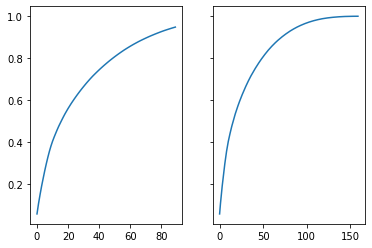

In [131]:
import numpy as np
from sklearn.decomposition import PCA

numcomp = 90
numcomp_total = 160

modelPCA = PCA(n_components=numcomp)
modelPCA.fit(X_train_scaled)

modelPCA_total = PCA(n_components=numcomp_total)
modelPCA_total.fit(X_train_scaled)

print(f"Varianza Acumulada: {str(sum(modelPCA.explained_variance_ratio_))} \n")
print(f"Varianza Acumulada Total: {str(sum(modelPCA_total.explained_variance_ratio_))} \n")

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.lineplot(data=np.cumsum(modelPCA.explained_variance_ratio_), ax = ax1)
sns.lineplot(data=np.cumsum(modelPCA_total.explained_variance_ratio_), ax = ax2)

Se implementa el modelo PCA y se obtiene la matriz de las primeras 90 componentes principales que más información contienen.

In [132]:
pcs=['PC{}'.format(i) for i in range(1, numcomp+1)]
scores_X_train = pd.DataFrame(modelPCA.transform(X_train_scaled),columns=pcs)
scores_X_test = pd.DataFrame(modelPCA.transform(X_test_scaled),columns=pcs)
scores_X_train['Damage']=['Train_' + tag_train[0]]*scores_X_train.shape[0]  
scores_X_test['Damage']=X_test.Damage
scores=scores_X_train.append(scores_X_test, ignore_index=True)
scores.reset_index(drop=True, inplace=True)
scores.iloc[[0,1,2,-3,-2,-1],[0,1,2,-3,-2,-1]]

,PC1,PC2,PC3,PC89,PC90,Damage
0,2.219917,5.082664,-2.741315,0.443148,-0.789762,Train_Undamaged
1,3.815740,3.454575,1.808368,0.023480,-0.073094,Train_Undamaged
2,3.917280,2.934040,-4.416322,0.591604,-0.243101,Train_Undamaged
5197,-7.433410,-4.220489,3.915705,-6.220679,7.506361,D03-31R
5198,-5.901716,-3.292299,5.581865,-6.400314,6.748717,D03-31R
5199,-5.795079,-0.931227,4.970527,-4.487314,7.112596,D03-31R


In [133]:
print(scores.shape)
aux = scores.pop('Damage')
scores = pd.concat([scores, aux], 1)
for j in range(scores.shape[0]):
    if scores.iloc[j,-1]=="Train_Undamaged":
        scores.iloc[j,-1]="Undamaged"
scores.iloc[[0,1,2,-3,-2,-1],[0,1,2,-3,-2,-1]]

(5200, 91)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,PC1,PC2,PC3,PC89,PC90,Damage
0,2.219917,5.082664,-2.741315,0.443148,-0.789762,Undamaged
1,3.815740,3.454575,1.808368,0.023480,-0.073094,Undamaged
2,3.917280,2.934040,-4.416322,0.591604,-0.243101,Undamaged
5197,-7.433410,-4.220489,3.915705,-6.220679,7.506361,D03-31R
5198,-5.901716,-3.292299,5.581865,-6.400314,6.748717,D03-31R
5199,-5.795079,-0.931227,4.970527,-4.487314,7.112596,D03-31R


(90, 160) (90, 1)


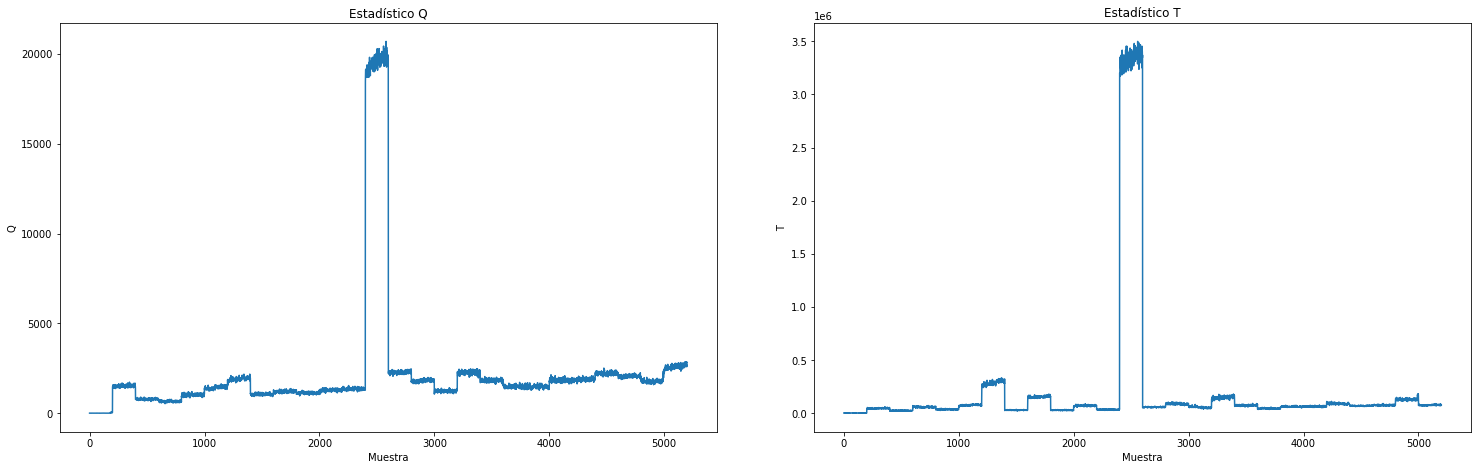

In [134]:
#ESTADÍSTICOS
P = pd.DataFrame(modelPCA.components_) #Eigenvectors
Lambda = pd.DataFrame(modelPCA.singular_values_) #Eigenvalues
print(P.shape,Lambda.shape)

#Cálulo Índice Q:
MQ_Train = pd.DataFrame(np.eye(P.shape[1]))-((P.T).dot(P))
Q_Train = pd.DataFrame(np.diagonal(X_train_scaled.dot(MQ_Train.dot(X_train_scaled.T))))

MQ_Test = pd.DataFrame(np.eye(P.shape[1]))-((P.T).dot(P))
Q_Test = pd.DataFrame(np.diagonal(X_test_scaled[:,:].dot(MQ_Test.dot(X_test_scaled[:,:].T))))

#Cálculo Índice T^2 Hotelling:
EigenValuesMatrix = pd.DataFrame(np.diag(Lambda[0]))

MT_Train = pd.DataFrame((P.T).dot(EigenValuesMatrix.dot(P)))
T_Train = pd.DataFrame(np.diagonal(X_train_scaled.dot(MT_Train.dot(X_train_scaled.T))))

MT_Test = pd.DataFrame((P.T).dot(EigenValuesMatrix.dot(P)))
T_Test = pd.DataFrame(np.diagonal(X_test_scaled[:,:].dot(MT_Test.dot(X_test_scaled[:,:].T))))

QT = pd.concat((Q_Train.append(Q_Test),T_Train.append(T_Test)),axis=1)
QT.columns = ["Q","T"]
QT.reset_index(drop=True, inplace=True)

fig,axe = plt.subplots(ncols=2,figsize=(22,8))
sns.lineplot(data=QT.iloc[:,0], ax=axe[0]).set(xlabel="Muestra", ylabel = "Q", title="Estadístico Q")
sns.lineplot(data=QT.iloc[:,1], ax=axe[1]).set(xlabel="Muestra", ylabel = "T", title="Estadístico T")
fig.tight_layout(pad=6.0)

In [135]:
print(scores.shape,QT.shape)
scores = pd.concat([scores, QT], axis=1)
aux = scores.pop('Damage')
scores = pd.concat([scores, aux], 1)
for j in range(scores.shape[0]):
    if scores.iloc[j,-1]=="Train_Undamaged":
        scores.iloc[j,-1]="Undamaged"
scores.iloc[[0,1,2,-3,-2,-1],[0,1,2,-3,-2,-1]]

(5200, 91) (5200, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  after removing the cwd from sys.path.


,PC1,PC2,PC3,Q,T,Damage
0,2.219917,5.082664,-2.741315,8.611273,3830.959769,Undamaged
1,3.815740,3.454575,1.808368,7.327802,4024.139107,Undamaged
2,3.917280,2.934040,-4.416322,8.176368,4007.771424,Undamaged
5197,-7.433410,-4.220489,3.915705,2741.090575,78984.888488,D03-31R
5198,-5.901716,-3.292299,5.581865,2829.404924,76283.775496,D03-31R
5199,-5.795079,-0.931227,4.970527,2832.939970,76223.198912,D03-31R


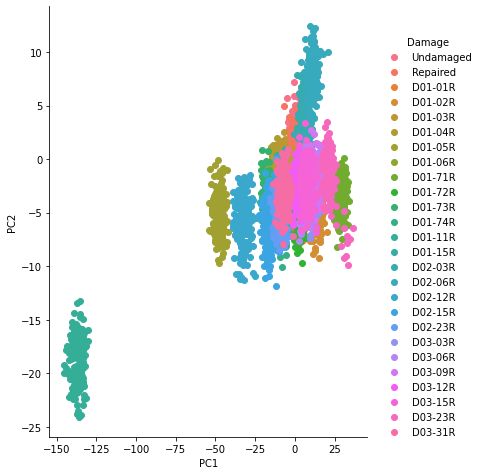

In [136]:
fg = sns.FacetGrid(data=scores, hue='Damage',height=5)
fg.map(plt.scatter, 'PC1', 'PC2').add_legend()
fg.fig.set_size_inches(7,7)

Accuracy: 0.728
              precision    recall  f1-score   support

     D01-01R      0.938     0.968     0.952        31
     D01-02R      1.000     0.911     0.953        45
     D01-03R      0.812     0.867     0.839        45
     D01-04R      0.452     0.528     0.487        36
     D01-05R      1.000     1.000     1.000        35
     D01-06R      0.425     0.472     0.447        36
     D01-11R      1.000     1.000     1.000        48
     D01-15R      0.974     0.949     0.961        39
     D01-71R      0.868     0.939     0.902        49
     D01-72R      0.472     0.395     0.430        43
     D01-73R      0.581     0.543     0.562        46
     D01-74R      0.771     0.711     0.740        38
     D02-03R      0.378     0.436     0.405        39
     D02-06R      0.742     0.697     0.719        33
     D02-12R      0.848     0.636     0.727        44
     D02-15R      0.619     0.667     0.642        39
     D02-23R      0.488     0.600     0.538        35
     D03-03

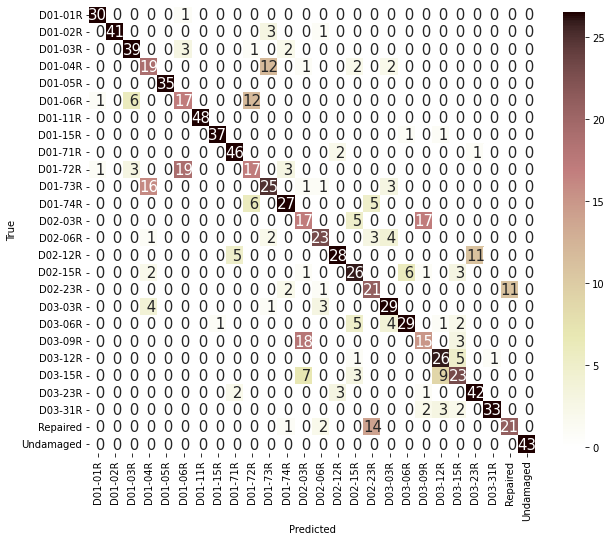

In [137]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Matriz de entrenamiento para el clasificador usando solo 2 Pc's
X_clasification = scores[list(scores.columns.drop("Damage"))]   
y_clasification = scores['Damage']

X_train_clas, X_test_clas, y_train_clas, y_test_clas = train_test_split(X_clasification,y_clasification, test_size=0.2, random_state=101)

K = 9
modelKNN = KNeighborsClassifier(n_neighbors=K, n_jobs=-1) 
modelKNN.fit(X_train_clas,y_train_clas) 
y_pred = modelKNN.predict(X_test_clas)
cm = confusion_matrix(y_test_clas, y_pred)

cm_df = pd.DataFrame(cm, index=modelKNN.classes_, columns=modelKNN.classes_)
cm_df.index.name = 'True'
cm_df.columns.name = 'Predicted'


ax = plt.subplots(figsize=(10,10)) 
cmp = sns.heatmap(cm_df,annot=True, cmap="pink_r",robust=True, fmt='2d',cbar_kws={"shrink": 0.80},cbar=True,square=True, annot_kws={'fontsize':15})
cmp.set_yticklabels(cmp.get_yticklabels(), rotation = 0, fontsize = 10)
cmp.set_xticklabels(cmp.get_xticklabels(), rotation = 90, fontsize = 10)
cmp

print(f"Accuracy: {round(accuracy_score(y_test_clas, y_pred),3)}")
print(classification_report(y_test_clas, y_pred, digits=3))

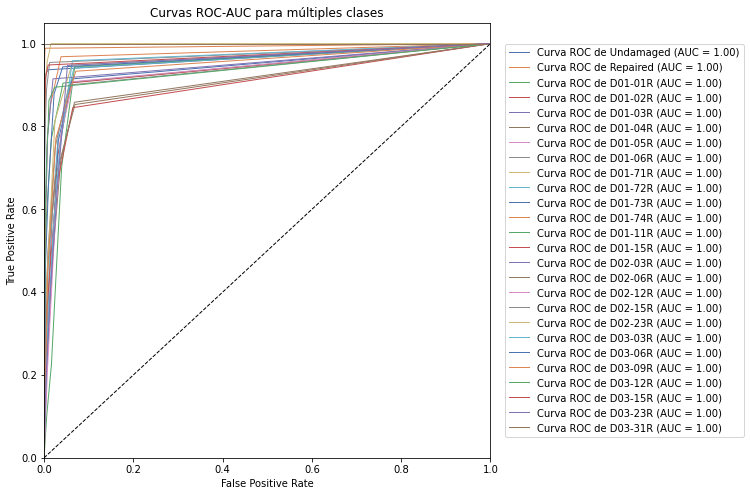

In [138]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.preprocessing import label_binarize

X = scores.drop("Damage", axis=1)
y = scores["Damage"]
clases = y

# Aplicar One Hot Encoding para substituir variables categóricas por numericas.
y = label_binarize(y, classes=list(np.unique(y)))
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(KNeighborsClassifier())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))    
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

lw=1
plt.figure(figsize=(8,8))

palette = sns.color_palette("deep", n_classes)
_, idx = np.unique(clases, return_index=True)
clases = list(clases[np.sort(idx)])
colors = cycle(list(palette.as_hex()))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,label=f"Curva ROC de {clases[i]} (AUC = {1:0.2f})".format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC-AUC para múltiples clases')
plt.legend(bbox_to_anchor=(0.8, 0,1,1),loc='center', ncol=1)
plt.show()